In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

sns.set()

In [11]:
listing_df = pd.read_csv('listings.csv')

In [2]:
listing_df.head()

In [3]:
listing_df.info()

In [4]:
listing_df.describe()

In [303]:
def get_num_null(df):
    """
    This function computes the count of the missing values in each column of a dataframe
    
    Parameters: 
            DataFrame like object
            
    Returns:
            a python dictionary like object
    """
    null_counts = {}
    for col in df.columns:
        null_counts[col] = {'count':sum(df[col].isnull()),
                           'proportion': sum(df[col].isnull())/df.shape[0]
                           }
    return null_counts

In [31]:
listing_null_counts = get_num_null(listing_df)

In [168]:
listing_new.info()

In [1]:
listing_new['room_type'].value_counts()

In [51]:
def drop_high_null_counts(df, cut_off = 0.1):
    """
    This function removes the columns with very high count of the missing values of a dataframe
    
    Parameters: 
            df: DataFrame like object
            cut_off: accepted proportion of missing values
            
    Returns:
            df: DataFrame like object
    """
    for col in listing_null_counts:
        if listing_null_counts[col]['proportion'] > cut_off:
            df = df.drop(col, axis=1)
    return df

In [52]:
listing_new = drop_high_null_counts(listing_df)

In [304]:
def extract_numbers(x):
    """
    This function extracts the numeric values from a string and converts to float
    
    Parameters: 
            x: string like object
            
    Returns:
            df: float like object
    """
    import re
    if type(x) == str:
        row = float(re.sub('\D', '', x))
    else:
        row = x 
    return row
listing_new['price'] = listing_new['price'].apply(lambda row: extract_numbers(row))

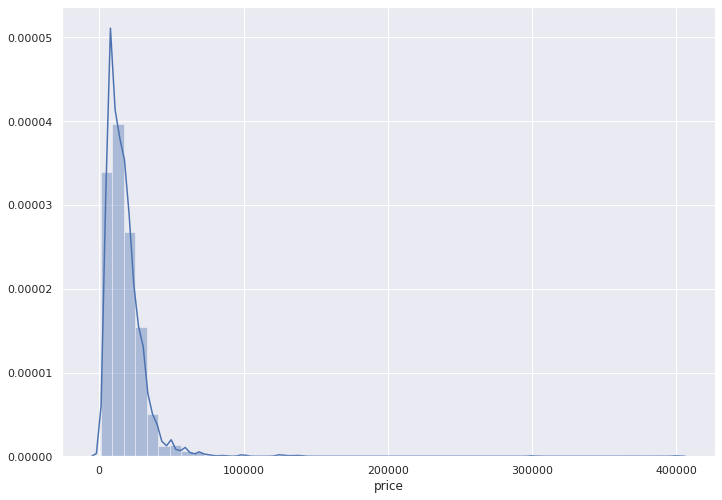

In [307]:
def plot_hist(data, col, dims = (11.7, 8.27)):
    """
    This function plots a histogram of a numerical variable
    
    Parameters: 
            data: a dataframe like object
            col: a string like object which can be found in data
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            figure: a matplot figure like object
    """
    fig, ax = plt.subplots(figsize=dims)
    figure = sns.distplot(data[col])
    
    return figure
plot_hist(listing_new, col = 'price');

In [308]:
def plot_heatmap(data, dims = (11.7, 8.27)):
    """
    This function plots a histogram of a numerical variable
    
    Parameters: 
            data: a dataframe like object
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            figure: a matplot figure like object
    """
    fig, ax = plt.subplots(figsize=dims)
    figure = sns.heatmap(data.corr())
    
    return figure

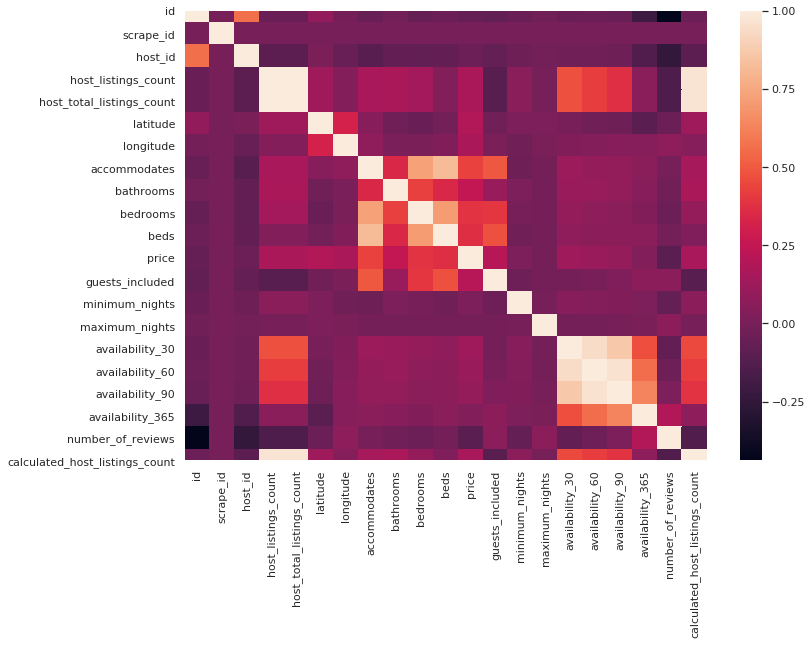

In [309]:
plot_heatmap(listing_new);

In [314]:
def get_numeric_data(df):
    """
    This function gets the numerical variables of a pandas dataframe like objects
    
    Parameters: 
            df: a dataframe like object
            
    Returns:
            data: dataframe like object
    """
    data = df.select_dtypes(include=np.number)
    return data

def get_category_data(df):
    """
    This function gets the categorical variables of a pandas dataframe like objects
    
    Parameters: 
            df: a dataframe like object
            
    Returns:
            dataframe like object
    """
    data = df.select_dtypes(include=['object'])

    return data

In [315]:
num_vars = get_numeric_data(listing_new)
cat_vars = get_category_data(listing_new)
price = num_vars['price']
num_var_features = num_vars.drop('price', axis=1)

# Which house features has over 5% correlation with the price. Also, which house feature has the highest linear relationship with the price?

In [316]:
def get_corr_vars(num_features, y, cut_off=0.05):
    """
    This function computes the correlation values of y and all the columns of num_features
    
    Parameters: 
            num_features: DataFrame like object
            y: a series like object of numerical type
            cut_off: a float value between 0 and 1 that is used to cut of uncorrelated variables
            
    Returns:
            correlation_all: a dict like object of all the calculated correlation
            correlated: a dict like object of all the highly correlated items based on the cut_off
    """
    correlation_all = {}
    correlated = {}
    for feature in num_features:
        corr_value = y.corr(num_features[feature])
        correlation_all[feature] = corr_value
        if abs(corr_value) >= cut_off:
            correlated[feature] = corr_value
    return correlation_all, correlated

In [317]:
correlate = get_corr_vars(num_var_features, price)

In [318]:
corr_data = pd.DataFrame.from_dict(correlate[1], orient='index', columns=['corr_coef'])
corr_data.reset_index(inplace=True)

In [322]:
def plot_corr(data, dims = (10,7)):
    """
    This function plots a line graph of the correlated variables
    
    Parameters: 
            data: a dataframe like object
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            chart: a matplot figure like object
    """
    plt.figure(figsize=dims)
    chart = sns.lineplot(x='index', y='corr_coef', data = data)
    # chart.set_xticklabels(labels=list(corr_data['index']),rotation = 45)
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.xlabel('Features')
    plt.ylabel('Correlation coefficient')
    plt.title('Correlation of House Price and the numerical features');
    
    return chart

In [320]:
list_ = list(correlate[1].keys())

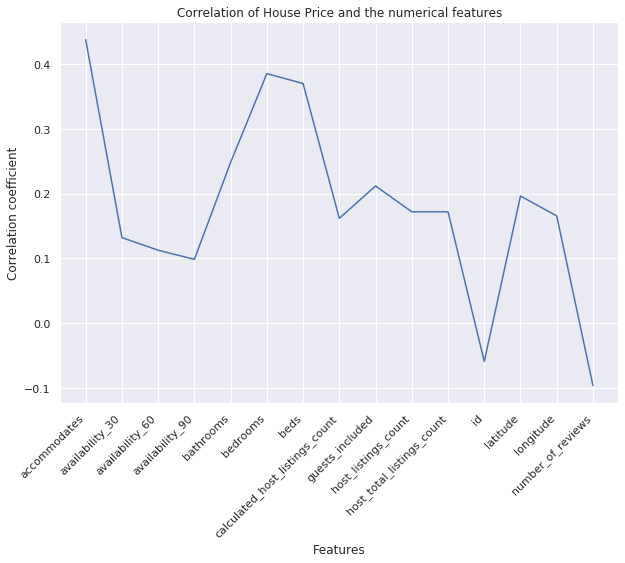

In [321]:
plot_corr(corr_data);

# How does the price of a house differ based on some categorical features

In [323]:
def get_cat_normal_level(df, levels = (1, 5)):
    """
    This function drops categorical columns with levels between the initialized levels
    
    Parameters: 
            df: a dataframe like object
            levels: a tuple like object of lenght two which signifies the levels. it is initialized between 1 and 5
            
    Returns:
            figure: a matplot figure like object
    """
    for column in df.columns:
        num_counts = len(df[column].value_counts())
        if num_counts > levels[0] and num_counts <= levels[1]:
            data = df.drop(column, axis=1)
        
    return data

In [324]:
categorical_features = get_cat_normal_level(cat_vars)

In [279]:
def fill_na(data, type_='numeric'):
    """
    This function fills the missing values of the columns of a dataframe like object
    
    Parameters: 
            data: a dataframe like object with all columns either numerical or categorical
            type_: a string like object that specifies whether to fill a 
                    numerical dataframe or categorial dataframe
            
    Returns:
            figure: a matplot figure like object
    """
    if type_ == 'numeric':
        for col in data.columns:
            data[col] = data[col].fillna(data[col].mean())
    else:
        for col in data.columns:
            data[col] = data[col].fillna(data[col].mode()[0])
    return data

In [280]:
categorical_features = fill_na(categorical_features, type_='category')

In [281]:
categorical_features.columns

Index(['last_scraped', 'experiences_offered', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'state', 'market',
       'country_code', 'country', 'is_location_exact', 'room_type', 'bed_type',
       'calendar_last_scraped', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture'],
      dtype='object')

In [282]:
categorical_features = categorical_features.drop(['last_scraped', 'experiences_offered', 'state', 'country', 'country_code', 'calendar_last_scraped'], axis=1)

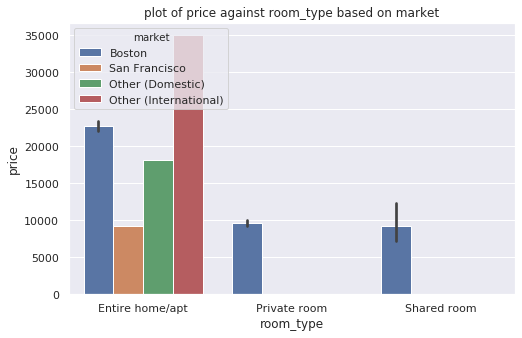

In [326]:
def plot_bar(data, x='room_type', y = price, hue=None, fig_size=(8,5)):  
    """
    This function plots a bar graph of the numerical variable against categorical variables
    
    Parameters: 
            data: a dataframe like object
            dims: a tuple like object of lenght two which signifies the figure size
            
    Returns:
            chart: a matplot figure like object
    """
    plt.figure(figsize=fig_size)
    chart = sns.barplot(x=x, y=price, data = data, hue=hue)
    plt.title('plot of {price} against {x} based on {hue}'.format(price=y.name, x = x, hue=hue))
    
    return chart
plot_bar(categorical_features, hue='market');

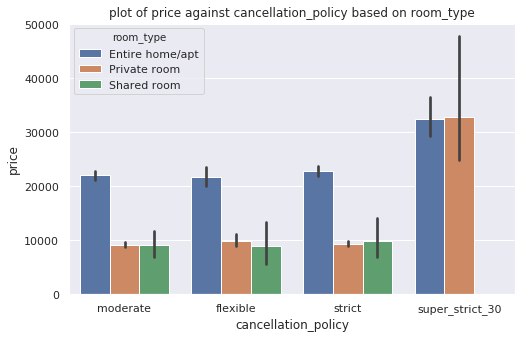

In [284]:
plot_bar(categorical_features, x='cancellation_policy', hue='room_type');

# What will the price of a new house be based on the the features

In [266]:
categorical_dummies = pd.get_dummies(data=categorical_features)

In [285]:
num_var_features=fill_na(num_var_features)

In [286]:
all_features = [num_var_features[list_], categorical_dummies]
features = pd.concat(all_features, axis=1)

In [287]:
features.dropna(axis=0, inplace=True)

In [288]:
features.drop('id', axis=1, inplace=True)

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = features
y = price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [295]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [299]:
y_pred = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Score:", np.round(model.score(X_test, y_test), 2))

MAE 24716234944077.176
MSE 3.850664054519593e+29
RMSE 620537191030448.5
Score: -1.3453146213260305e+21
